In [1]:
library("factoextra")
options(repr.plot.width=12, repr.plot.height=13)

Loading required package: ggplot2
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


In [2]:
path="C:/Users/Jordi/New_Jupyter/"
setwd(path)
mydata = read.csv("threads_ideal_data_partial_sp_cl+listR.csv", sep=";")
unique(mydata[,"comp_opt"])

[1] O2
Levels: O2

In [3]:
colnames(mydata)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "time_x"       "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN" 
[16] "PAPI_BR_MSP"  "time_y"       "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM" 
[21] "time_x.1"     "PAPI_SP_OPS"  "PAPI_LD_INS"  "PAPI_L2_STM"  "time_y.1"    
[26] "PAPI_TLB_DM"  "PAPI_L2_DCH"  "time"         "time_log"     "P_index"     
[31] "ideal"        "affinity"     "T_list"       "P_list"

In [4]:
library(stringr)
colnames(mydata)<-gsub(x = names(mydata), pattern = "\\.", replacement = "_" )

In [5]:
#colnames(mydata)

In [6]:
mydata_no_time <- subset(mydata, select = -c(P_list))
mydata_no_time <- subset(mydata_no_time, select = -c(T_list))
mydata_no_time <- subset(mydata_no_time, select = -c(ideal))
mydata_no_time <- subset(mydata_no_time, select = -c(P_index))
mydata_no_time <- subset(mydata_no_time, select = -c(time_log))
mydata_no_time <- subset(mydata_no_time, select = -c(time))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x_1))
mydata_no_time <- subset(mydata_no_time, select = -c(time_x))
mydata_no_time <- subset(mydata_no_time, select = -c(time_y))
mydata_no_time <- subset(mydata_no_time, select = -c(affinity))




mydata_no_time <- subset(mydata_no_time, select = -c(PAPI_SP_OPS))



In [7]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [8]:
#mydata = mydata[mydata$comp_opt != 'NF',]
#mydata = mydata[mydata$comp_opt != 'O1',]
#mydata = mydata[mydata$label != '2D4PStencil_E',]
#mydata = mydata[mydata$label != 'Reduction_E',]
#mydata = mydata[mydata$label != '2PStencil_E',]

#head(mydata)
#unique(mydata[,"comp_opt"])

In [9]:
#head(mydata)

In [10]:
dfu <- unique(mydata_no_time$size_vector)
#dfu[order(dfu)]

comprss <- function(tx) { 
      div <- findInterval(as.numeric(gsub("\\,", "", tx)), 
                          c(1, 1e3, 1e6, 1e9, 1e12) )
      paste(round( as.numeric(gsub("\\,","",tx))/10^(3*(div-1)), 2), 
           c("","K","M","B","T")[div] )}
comprss(dfu[order(dfu)])



[1] "1 K"   "2 K"   "3 K"   "4 K"   "5 K"   "6 K"   "7 K"   "8 K"   "9 K"  
[10] "10 K"  "20 K"  "30 K"  "40 K"  "50 K"  "60 K"  "70 K"  "80 K"  "90 K" 
[19] "100 K" "200 K" "300 K" "400 K" "500 K" "600 K" "700 K" "800 K" "900 K"
[28] "1 M"   "2 M"   "3 M"   "5 M"   "7 M"   "9 M"   "20 M"  "40 M"  "60 M" 
[37] "80 M"  "100 M" "120 M" "140 M" "160 M" "180 M" "200 M"

In [11]:
#print(new_mydata[,c("PAPI_VEC_SP","PAPI_VEC_DP")])
#print(mydata[,c("PAPI_VEC_SP","PAPI_SP_OPS")])

In [12]:
#div = mydata$PAPI_SP_OPS/mydata$PAPI_VEC_SP
#div <- na.omit(div)
#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN + mydata$PAPI_BR_UCN)

In [13]:
#mean(div)
#quantile(div,0.25)
#quantile(div,0.5)
#quantile(div,0.75)
#boxplot(div)

In [14]:
#print(mydata[,c("PAPI_BR_INS","PAPI_BR_CN","PAPI_BR_UCN")])#subs = mydata$PAPI_BR_INS-(mydata$PAPI_BR_CN/mydata$PAPI_BR_UCN)
#print(subs)
#perc = subs/mydata$PAPI_BR_INS

#head(percent(perc[order(perc,decreasing = TRUE)]))

In [15]:
#all(new_mydata$PAPI_VEC_SP == new_mydata$PAPI_VEC_DP)
all(mydata_no_time$PAPI_DP_SP == mydata_no_time$PAPI_SP_OPS)

[1] TRUE

In [16]:
colnames(mydata_no_time)

[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [17]:
colnames(mydata_no_time[6:ncol(mydata_no_time)])

[1] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
 [6] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[11] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[16] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [18]:
new_mydata = mydata_no_time[,6:ncol(mydata_no_time)]
dim(new_mydata)


[1] 1548000      17

In [19]:
new_mydata

PAPI_L1_DCM,PAPI_L3_TCM,PAPI_TOT_INS,PAPI_REF_CYC,PAPI_L2_LDM,PAPI_SR_INS,PAPI_BR_UCN,PAPI_BR_CN,PAPI_BR_TKN,PAPI_BR_MSP,PAPI_FP_OPS,PAPI_L1_LDM,PAPI_L1_STM,PAPI_LD_INS,PAPI_L2_STM,PAPI_TLB_DM,PAPI_L2_DCH
5792,296,728331,1280646,2074,33185,8405,206376,122216,1927,71,4451,777,119687,370,233,3398
3389,4,1109926,1883952,514,32261,8125,281808,159757,1685,24,3007,630,196461,246,75,2712
3992,1,1162254,1983816,688,32036,8128,261973,149834,1591,25,2793,567,178913,123,57,2510
3306,0,1088427,1842192,456,32261,8104,278682,158179,1635,24,2776,486,179265,125,72,2667
3457,0,1084172,1834992,456,32032,8115,279794,158622,1596,24,2890,546,210295,107,51,2624
3305,0,1090388,1845198,474,32261,8114,275006,156418,1617,24,2752,486,179154,128,64,2625
3457,0,1116139,1893816,516,32032,8122,285333,161434,1584,24,2783,539,178378,117,62,2540
3333,1,1106619,1876392,476,32265,8107,277816,157710,1600,24,2754,481,178317,121,66,2605
3431,1,1080156,1827504,471,32032,8114,274878,156209,1527,24,2804,542,177924,120,57,2579
3354,1,1110830,1884186,520,32265,8143,349034,208324,1657,24,2989,511,183190,122,66,2654


In [20]:
colnames(mydata_no_time)
log.ir <-scale(new_mydata, center = TRUE, scale = TRUE)
res.label <- mydata_no_time[,4]
res.pca <- prcomp(log.ir, center = TRUE, scale. = TRUE)



[1] "id"           "size_vector"  "comp_opt"     "label"        "threads"     
 [6] "PAPI_L1_DCM"  "PAPI_L3_TCM"  "PAPI_TOT_INS" "PAPI_REF_CYC" "PAPI_L2_LDM" 
[11] "PAPI_SR_INS"  "PAPI_BR_UCN"  "PAPI_BR_CN"   "PAPI_BR_TKN"  "PAPI_BR_MSP" 
[16] "PAPI_FP_OPS"  "PAPI_L1_LDM"  "PAPI_L1_STM"  "PAPI_LD_INS"  "PAPI_L2_STM" 
[21] "PAPI_TLB_DM"  "PAPI_L2_DCH"

In [21]:
print(res.pca)

Standard deviations (1, .., p=17):
 [1] 3.318865731 1.502962062 0.958927204 0.832702310 0.740999024 0.726233225
 [7] 0.689109924 0.477307310 0.368839675 0.301269942 0.228968784 0.198261026
[13] 0.108145158 0.047398211 0.035239715 0.018785515 0.005886896

Rotation (n x k) = (17 x 17):
                   PC1         PC2         PC3         PC4          PC5
PAPI_L1_DCM  0.2808349  0.15730548 -0.22848759  0.05473066 -0.057524046
PAPI_L3_TCM  0.2563899  0.20720725 -0.02009473 -0.06600894  0.363997034
PAPI_TOT_INS 0.2647949 -0.29604947  0.01843058  0.04792799  0.071557379
PAPI_REF_CYC 0.2615849  0.16402431 -0.05374183 -0.20260704  0.388676119
PAPI_L2_LDM  0.2439970  0.25923135 -0.06433323  0.17418802  0.077195298
PAPI_SR_INS  0.2755932 -0.19309615  0.09587276  0.07162522 -0.029775059
PAPI_BR_UCN  0.1810360 -0.01330907  0.10232183 -0.88210682 -0.316980415
PAPI_BR_CN   0.2750366 -0.19723479  0.14409772  0.05071551 -0.039087188
PAPI_BR_TKN  0.2748683 -0.19799334  0.14315414  0.05733359 -0.04091

In [22]:
names(res.pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

In [23]:
print(res.pca$sdev)

 [1] 3.318865731 1.502962062 0.958927204 0.832702310 0.740999024 0.726233225
 [7] 0.689109924 0.477307310 0.368839675 0.301269942 0.228968784 0.198261026
[13] 0.108145158 0.047398211 0.035239715 0.018785515 0.005886896


In [24]:
head(unclass(res.pca$rotation)[])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
PAPI_L1_DCM,0.2808349,0.1573055,-0.22848759,0.05473066,-0.05752405,0.04903009,-0.09856982,0.10585475,-0.06406558,0.12956084,-0.029042871,-0.3657906,0.80870280,-0.06875880,0.016044210,-0.005040362,0.001727824
PAPI_L3_TCM,0.2563899,0.2072072,-0.02009473,-0.06600894,0.36399703,0.19438850,0.05934937,-0.12066083,0.72620641,0.12625799,-0.042587840,-0.3239763,-0.19660287,0.07497038,-0.061810492,-0.001652365,0.004314650
PAPI_TOT_INS,0.2647949,-0.2960495,0.01843058,0.04792799,0.07155738,-0.11442977,0.05754133,-0.13353163,-0.08656008,-0.32198505,-0.084956466,-0.0517311,0.09315400,0.76785094,-0.283365840,-0.024584059,-0.003349737
PAPI_REF_CYC,0.2615849,0.1640243,-0.05374183,-0.20260704,0.38867612,0.23983342,0.18037772,0.09944278,-0.04938837,0.10389557,0.085443277,0.7335671,0.21732643,0.06119405,0.001695246,-0.005399306,-0.007423604
PAPI_L2_LDM,0.2439970,0.2592313,-0.06433323,0.17418802,0.07719530,-0.23110862,-0.53152175,-0.03642962,-0.04557468,-0.06155357,0.001009545,0.1049367,-0.14312915,0.17000011,0.440543547,0.484928683,-0.008514573
PAPI_SR_INS,0.2755932,-0.1930961,0.09587276,0.07162522,-0.02977506,-0.13597728,0.06864054,0.26650822,0.09463666,-0.07480270,-0.829276754,0.1221845,-0.03239695,-0.24090035,0.031666209,0.007576587,0.001664051


In [25]:
# Eigenvalues
eig <- (res.pca$sdev)^2
print(eig)

 [1] 1.101487e+01 2.258895e+00 9.195414e-01 6.933931e-01 5.490796e-01
 [6] 5.274147e-01 4.748725e-01 2.278223e-01 1.360427e-01 9.076358e-02
[11] 5.242670e-02 3.930743e-02 1.169538e-02 2.246590e-03 1.241838e-03
[16] 3.528956e-04 3.465554e-05


In [26]:
# Variances in percentage
variance <- eig*100/sum(eig)
print(variance)

 [1] 6.479335e+01 1.328762e+01 5.409067e+00 4.078783e+00 3.229880e+00
 [6] 3.102439e+00 2.793368e+00 1.340131e+00 8.002512e-01 5.339034e-01
[11] 3.083924e-01 2.312202e-01 6.879632e-02 1.321524e-02 7.304927e-03
[16] 2.075856e-03 2.038561e-04


In [27]:
# Cumulative variances
cumvar <- cumsum(variance)
print(cumvar)

 [1]  64.79335  78.08097  83.49004  87.56882  90.79870  93.90114  96.69451
 [8]  98.03464  98.83489  99.36879  99.67718  99.90840  99.97720  99.99042
[15]  99.99772  99.99980 100.00000


In [28]:
eig.decathlon2.active <- data.frame(eig = eig, variance = variance,cumvariance = cumvar)
print(eig.decathlon2.active)

            eig     variance cumvariance
1  1.101487e+01 6.479335e+01    64.79335
2  2.258895e+00 1.328762e+01    78.08097
3  9.195414e-01 5.409067e+00    83.49004
4  6.933931e-01 4.078783e+00    87.56882
5  5.490796e-01 3.229880e+00    90.79870
6  5.274147e-01 3.102439e+00    93.90114
7  4.748725e-01 2.793368e+00    96.69451
8  2.278223e-01 1.340131e+00    98.03464
9  1.360427e-01 8.002512e-01    98.83489
10 9.076358e-02 5.339034e-01    99.36879
11 5.242670e-02 3.083924e-01    99.67718
12 3.930743e-02 2.312202e-01    99.90840
13 1.169538e-02 6.879632e-02    99.97720
14 2.246590e-03 1.321524e-02    99.99042
15 1.241838e-03 7.304927e-03    99.99772
16 3.528956e-04 2.075856e-03    99.99980
17 3.465554e-05 2.038561e-04   100.00000


In [29]:
summary(res.pca)

Importance of components:
                          PC1    PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     3.3189 1.5030 0.95893 0.83270 0.7410 0.72623 0.68911
Proportion of Variance 0.6479 0.1329 0.05409 0.04079 0.0323 0.03102 0.02793
Cumulative Proportion  0.6479 0.7808 0.83490 0.87569 0.9080 0.93901 0.96695
                          PC8    PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     0.4773 0.3688 0.30127 0.22897 0.19826 0.10815 0.04740
Proportion of Variance 0.0134 0.0080 0.00534 0.00308 0.00231 0.00069 0.00013
Cumulative Proportion  0.9804 0.9883 0.99369 0.99677 0.99908 0.99977 0.99990
                          PC15    PC16     PC17
Standard deviation     0.03524 0.01879 0.005887
Proportion of Variance 0.00007 0.00002 0.000000
Cumulative Proportion  0.99998 1.00000 1.000000

In [30]:
library("factoextra")
eig.val <- get_eigenvalue(res.pca)
head(eig.val)

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,11.0148697,64.793351,64.79335
Dim.2,2.2588950,13.287617,78.08097
Dim.3,0.9195414,5.409067,83.49004
Dim.4,0.6933931,4.078783,87.56882
Dim.5,0.5490796,3.229880,90.79870
Dim.6,0.5274147,3.102439,93.90114


In [31]:
options(repr.plot.width = 20, repr.plot.height = 10)

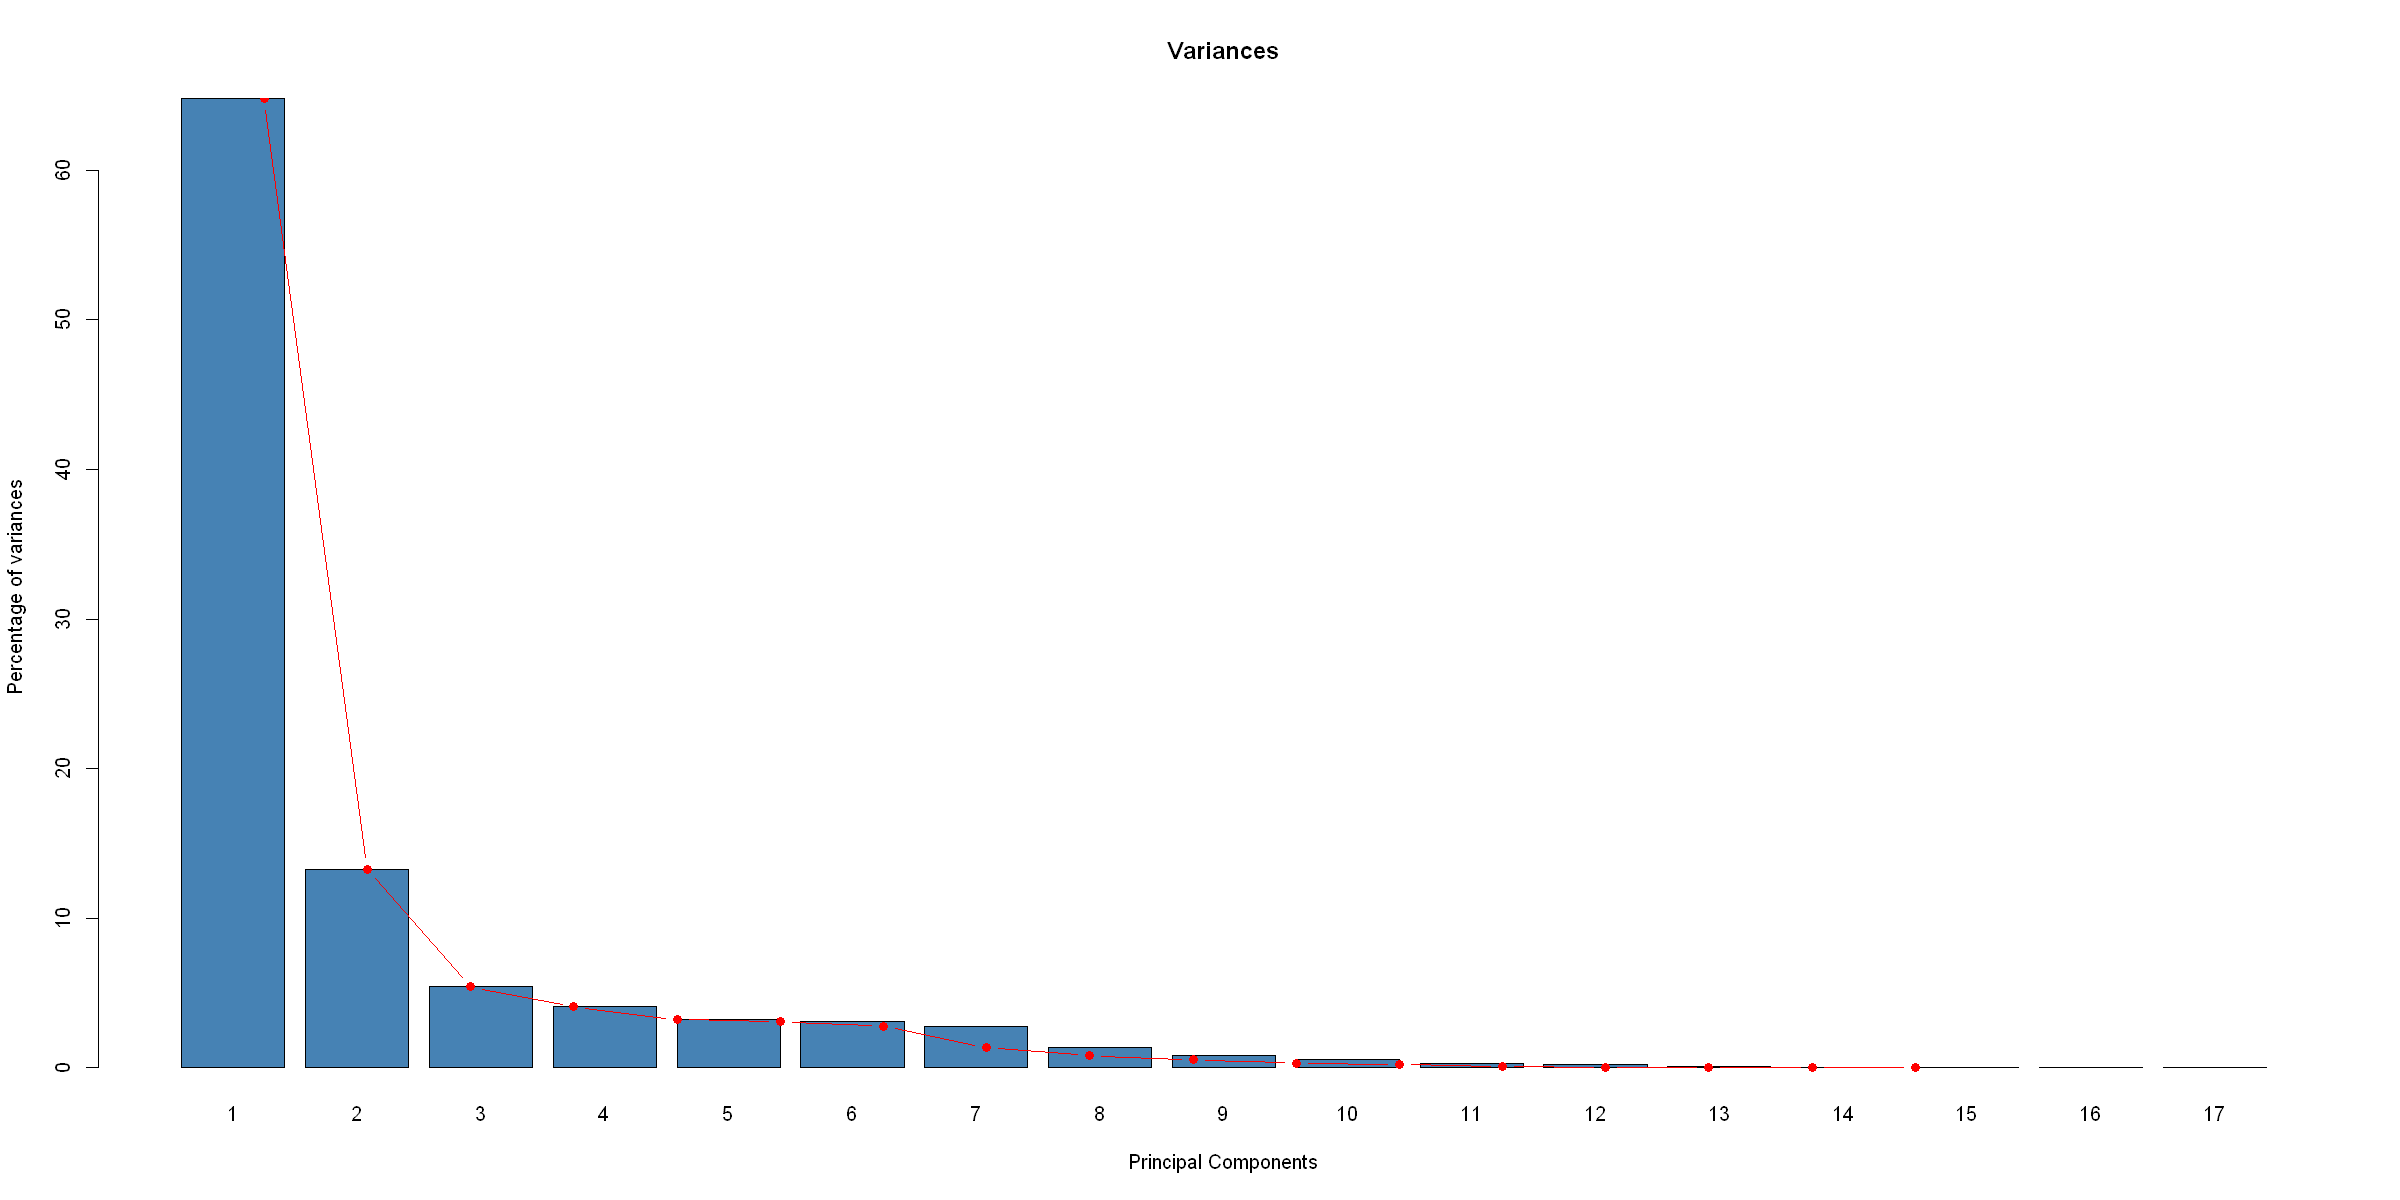

In [32]:
barplot(eig.decathlon2.active[, 2], names.arg=1:nrow(eig.decathlon2.active), 
       main = "Variances",
       xlab = "Principal Components",
       ylab = "Percentage of variances",
       col ="steelblue")
# Add connected line segments to the plot
lines(x = 1:nrow(eig.decathlon2.active), 
      eig.decathlon2.active[, 2], 
      type="b", pch=19, col = "red")

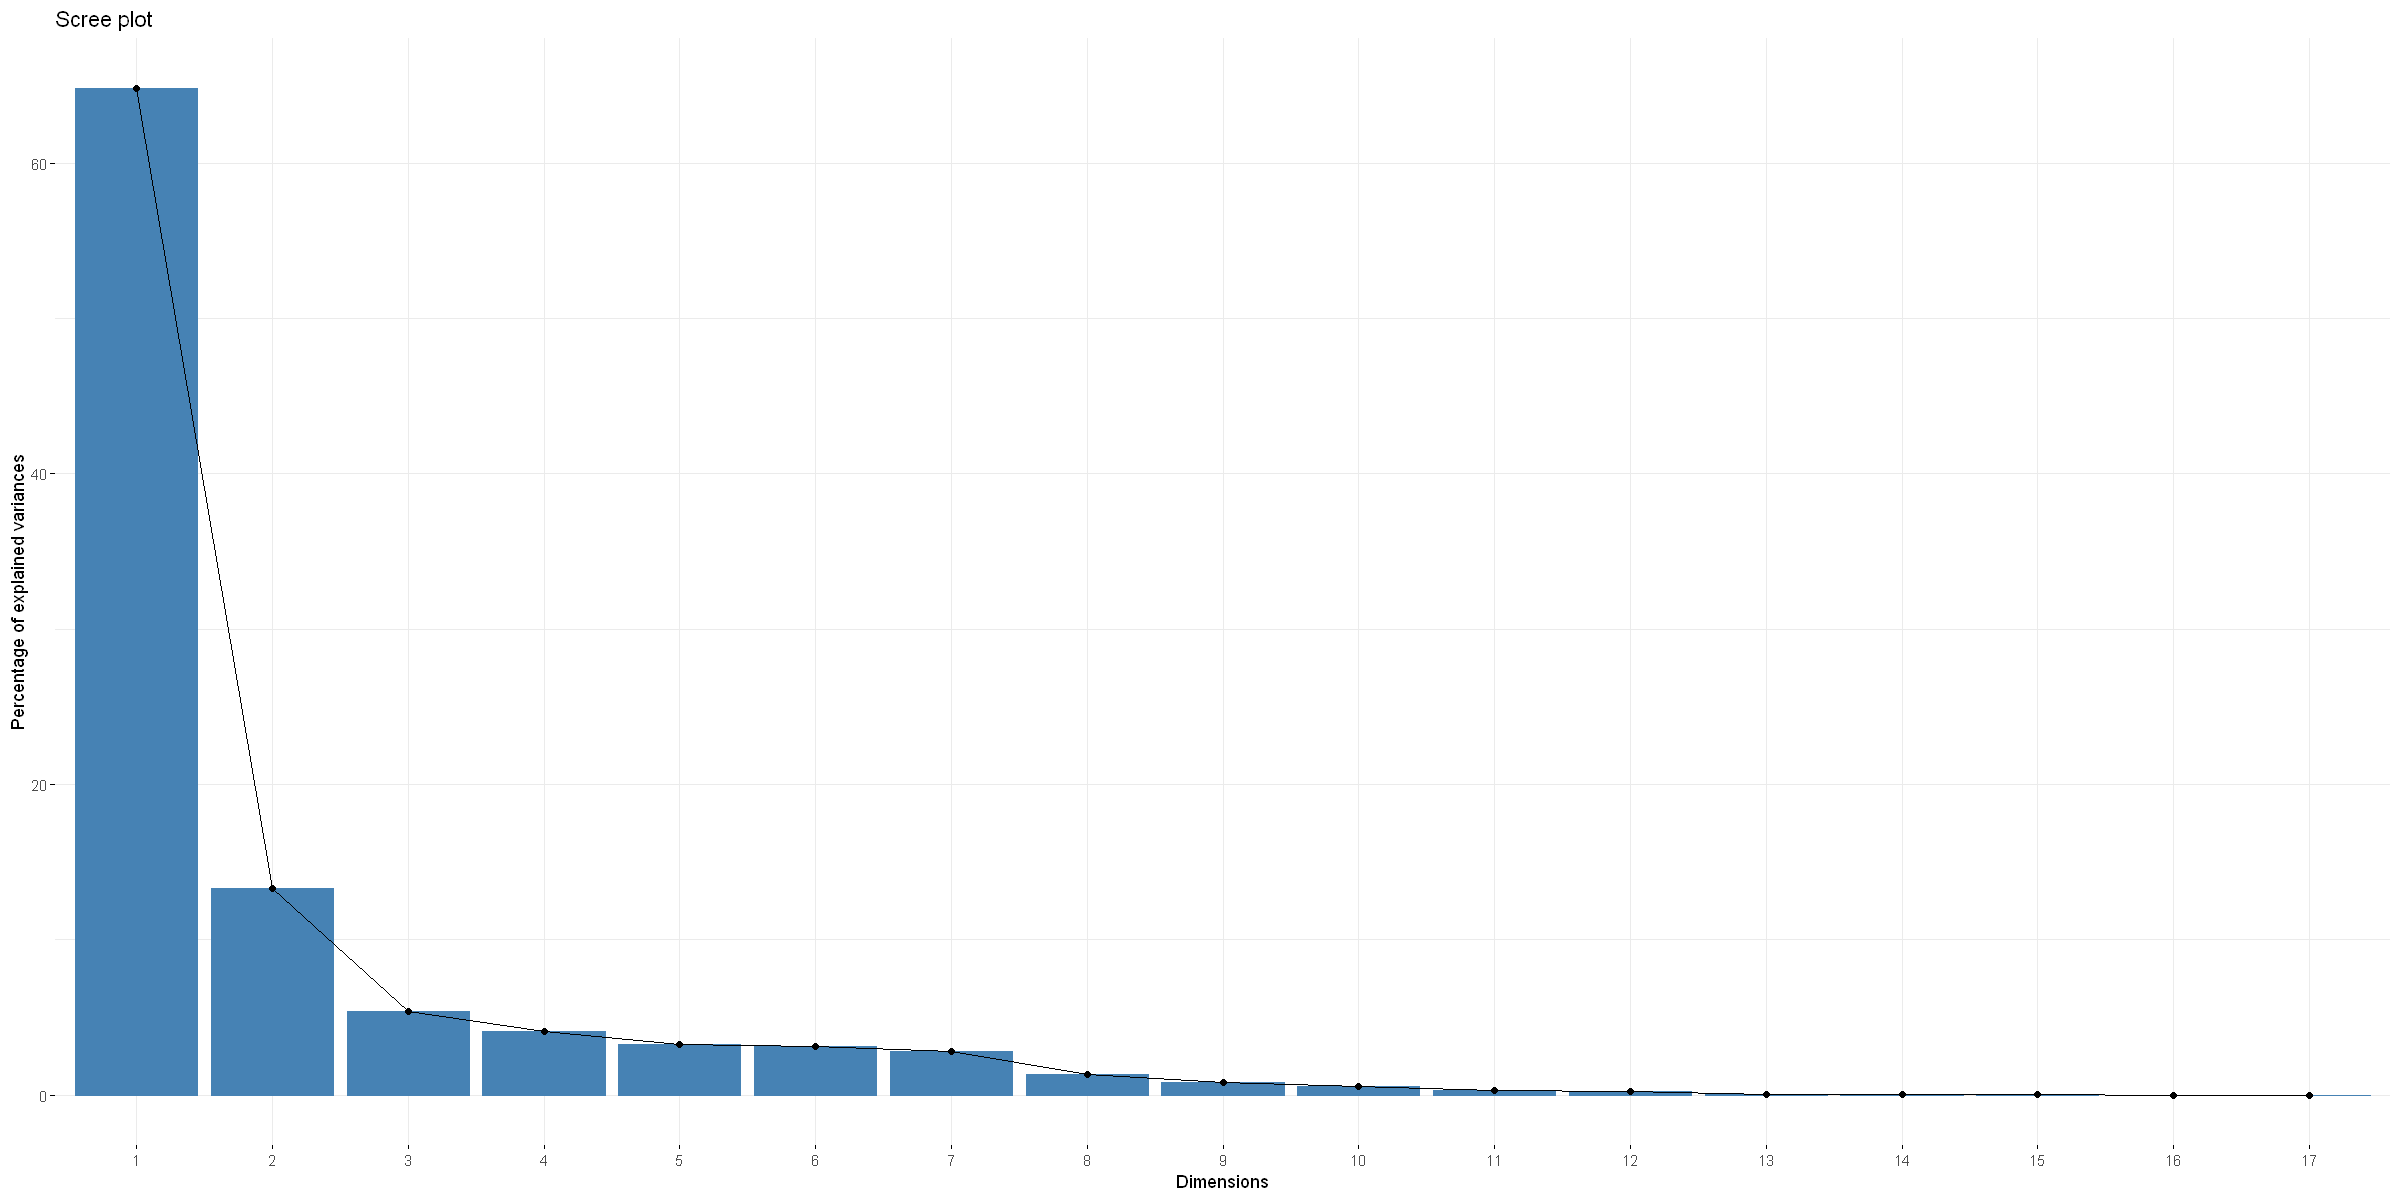

In [33]:
fviz_screeplot(res.pca, ncp=54)

In [34]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

In [35]:
var$coord


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5,Dim.6,Dim.7,Dim.8,Dim.9,Dim.10,Dim.11,Dim.12,Dim.13,Dim.14,Dim.15,Dim.16,Dim.17
PAPI_L1_DCM,0.9320535,0.23642416,-0.21910297,0.04557435,-0.042625262,0.03560728,-0.06792544,0.05052524,-0.02362993,0.039032788,-0.0066499107,-0.072522026,0.0874572926,-3.259044e-03,5.653934e-04,-9.468579e-05,1.017152e-05
PAPI_L3_TCM,0.8509235,0.31142463,-0.01926938,-0.05496580,0.269721447,0.14117139,0.04089824,-0.05759230,0.26785374,0.038037739,-0.0097512859,-0.064231864,-0.0212616482,3.553462e-03,-2.178184e-03,-3.104052e-05,2.539990e-05
PAPI_TOT_INS,0.8788188,-0.44495112,0.01767358,0.03990975,0.053023948,-0.08310270,0.03965230,-0.06373562,-0.03192679,-0.097004418,-0.0194523787,-0.010256261,0.0100741535,3.639476e-02,-9.985732e-03,-4.618242e-04,-1.971955e-05
PAPI_REF_CYC,0.8681652,0.24652231,-0.05153450,-0.16871135,0.288008625,0.17417500,0.12430008,0.04746476,-0.01821639,0.031300612,0.0195638431,0.145437767,0.0235028007,2.900489e-03,5.973999e-05,-1.014287e-04,-4.370198e-05
PAPI_L2_LDM,0.8097932,0.38961488,-0.06169088,0.14504677,0.057201640,-0.16783876,-0.36627691,-0.01738812,-0.01680975,-0.018544241,0.0002311544,0.020804861,-0.0154787246,8.057701e-03,1.552463e-02,9.109635e-03,-5.012440e-05
PAPI_SR_INS,0.9146568,-0.29021619,0.09193500,0.05964248,-0.022063289,-0.09875122,0.04730088,0.12720632,0.03490575,-0.022535806,-0.1898784898,0.024224418,-0.0035035738,-1.141825e-02,1.115908e-03,1.423301e-04,9.796093e-06
PAPI_BR_UCN,0.6008340,-0.02000303,0.09811918,-0.73453239,-0.234882179,-0.09943779,-0.14669076,-0.05010411,0.01775215,0.003314963,-0.0036246206,-0.002767863,-0.0003244420,-4.800667e-05,-5.643831e-05,5.341467e-06,-2.181673e-05
PAPI_BR_CN,0.9128094,-0.29643641,0.13817922,0.04223092,-0.028963568,-0.12311116,0.06295990,0.15951151,0.05134512,-0.050429177,0.0858901607,-0.001958539,-0.0013155315,-6.302393e-03,2.264029e-03,1.674590e-04,4.169228e-03
PAPI_BR_TKN,0.9122509,-0.29757647,0.13727440,0.04774181,-0.030319577,-0.12229075,0.06342251,0.15942150,0.05313085,-0.050455352,0.0857744330,-0.003914860,-0.0015779636,-6.823749e-03,1.857861e-03,-3.451880e-06,-4.155030e-03
PAPI_BR_MSP,0.8587901,0.21231057,0.18817340,-0.11738748,0.205009917,0.23501502,0.02986707,0.12229678,-0.21847275,0.009996513,-0.0059118494,-0.078066812,-0.0338341259,-7.167098e-04,-3.872854e-04,8.739157e-05,2.535059e-06


Loading required package: plyr
Loading required package: scales
Loading required package: grid


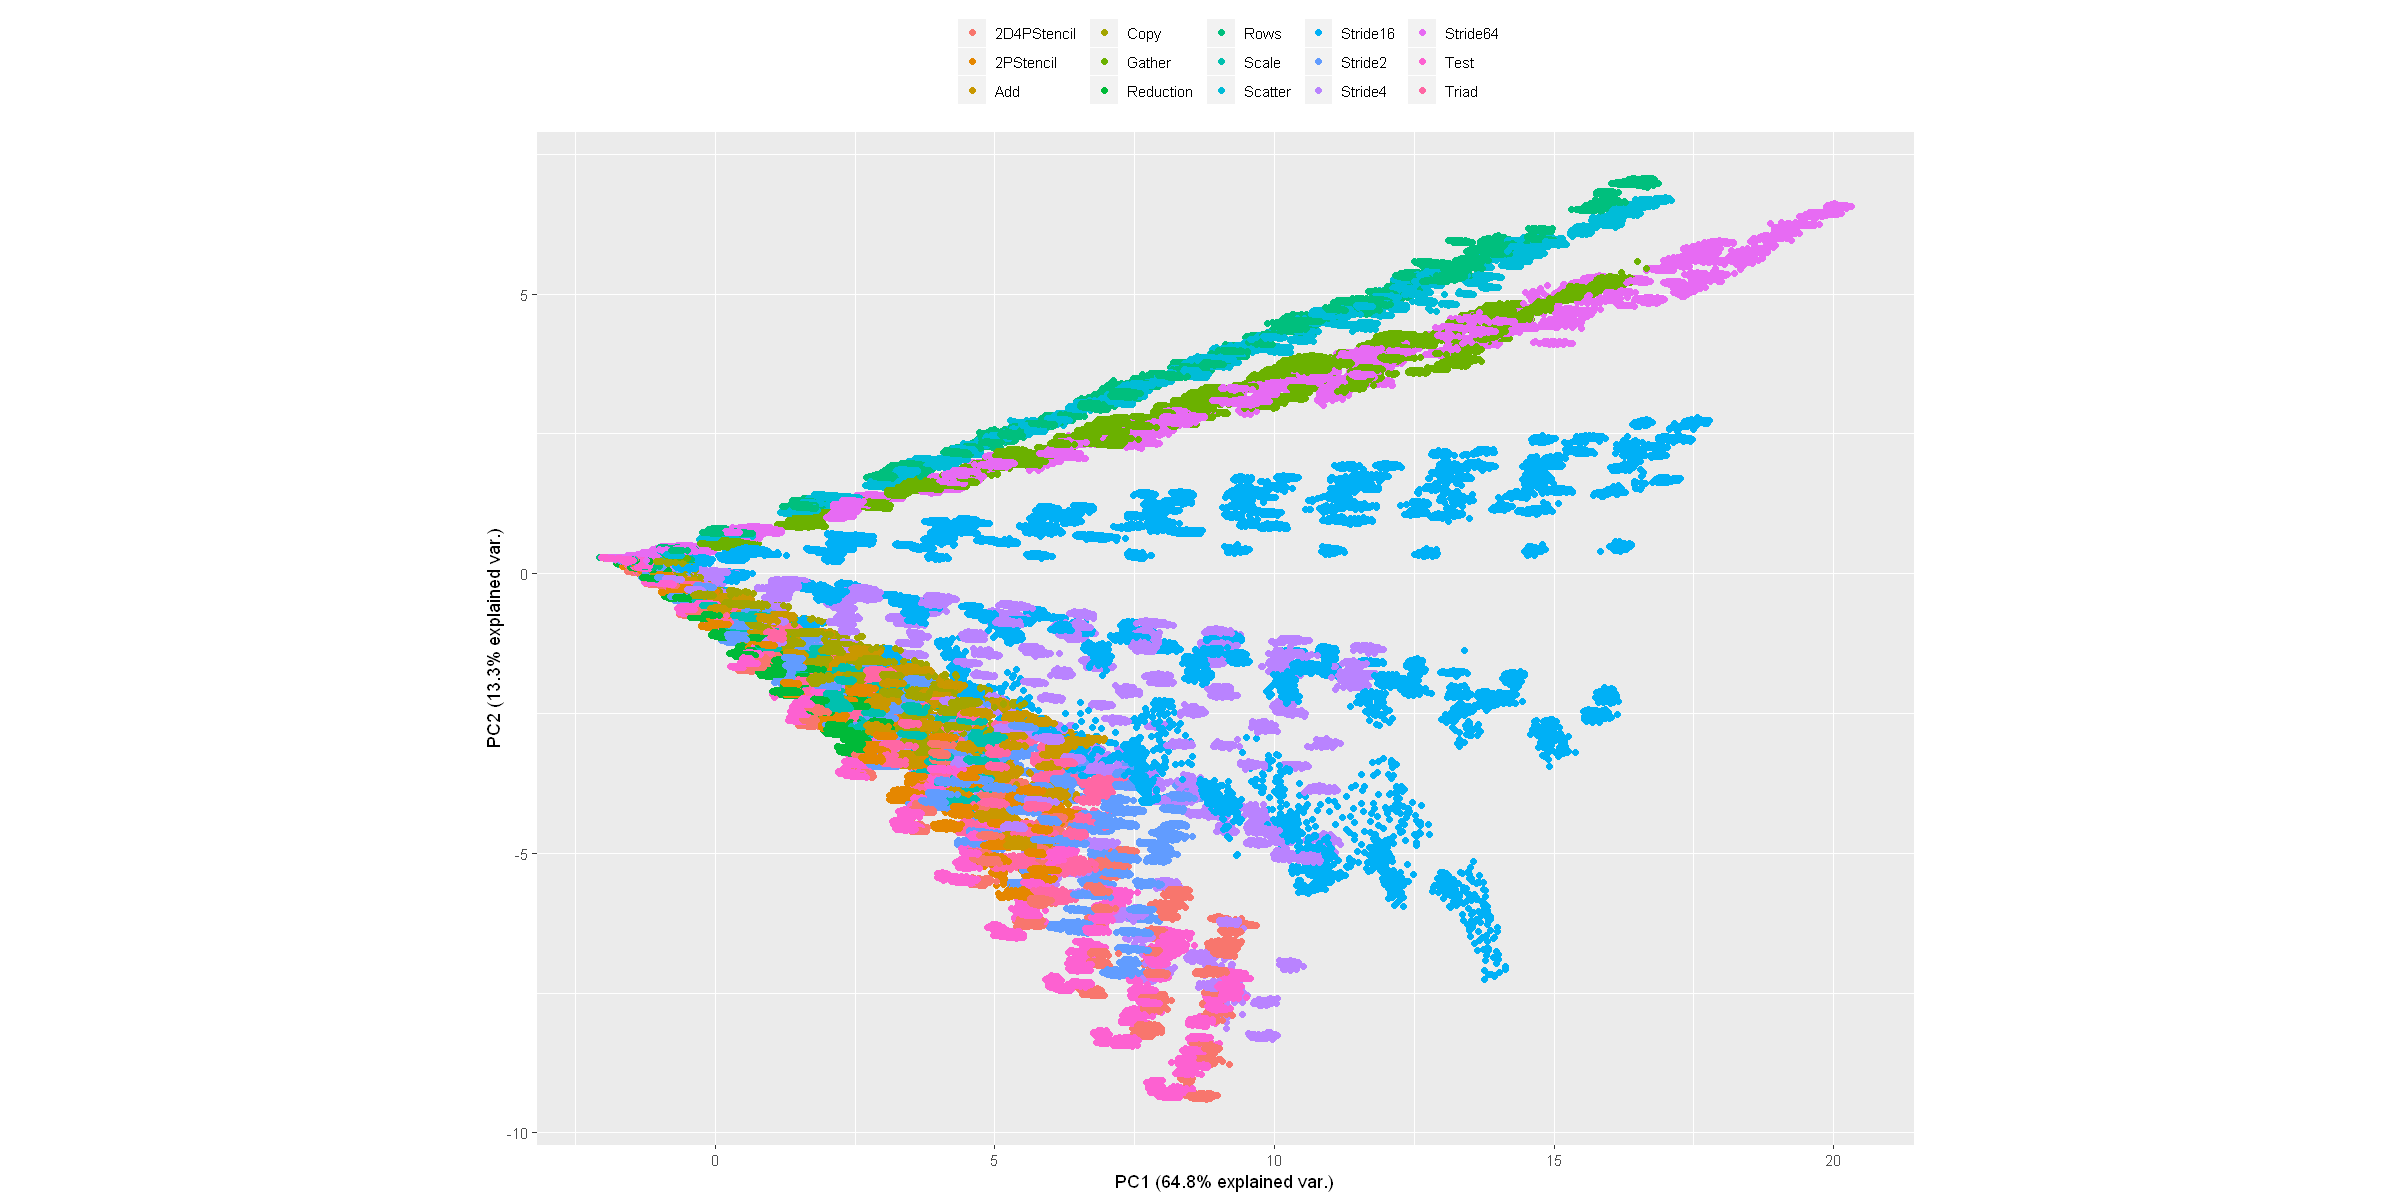

In [36]:
library(devtools)
library(ggbiplot)
g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = res.label, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
#g <- ggbiplot(res.pca, obs.scale = 1, var.scale = 1, groups = {res.label, res.threads}, ellipse = FALSE, circle = TRUE, var.axes=FALSE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', legend.position = 'top')
print(g)

In [37]:
# Helper function : 
# Correlation between variables and principal components
var_cor_func <- function(var.loadings, comp.sdev){
  var.loadings*comp.sdev
  }

# Variable correlation/coordinates
loadings <- res.pca$rotation
sdev <- res.pca$sdev

var.coord <- var.cor <- t(apply(loadings, 1, var_cor_func, sdev))
print(var.coord[, 1:4])

                   PC1         PC2         PC3         PC4
PAPI_L1_DCM  0.9320535  0.23642416 -0.21910297  0.04557435
PAPI_L3_TCM  0.8509235  0.31142463 -0.01926938 -0.05496580
PAPI_TOT_INS 0.8788188 -0.44495112  0.01767358  0.03990975
PAPI_REF_CYC 0.8681652  0.24652231 -0.05153450 -0.16871135
PAPI_L2_LDM  0.8097932  0.38961488 -0.06169088  0.14504677
PAPI_SR_INS  0.9146568 -0.29021619  0.09193500  0.05964248
PAPI_BR_UCN  0.6008340 -0.02000303  0.09811918 -0.73453239
PAPI_BR_CN   0.9128094 -0.29643641  0.13817922  0.04223092
PAPI_BR_TKN  0.9122509 -0.29757647  0.13727440  0.04774181
PAPI_BR_MSP  0.8587901  0.21231057  0.18817340 -0.11738748
PAPI_FP_OPS  0.6723845 -0.59069553 -0.24878009 -0.03717010
PAPI_L1_LDM  0.8779146  0.23161580 -0.10754731  0.15874819
PAPI_L1_STM  0.8265432  0.33934225 -0.28824031  0.04986763
PAPI_LD_INS  0.7823917 -0.42429280  0.29872198  0.11914461
PAPI_L2_STM  0.7742615  0.43122742 -0.27002429  0.04299196
PAPI_TLB_DM  0.5072861  0.42781952  0.64151534  0.155968

In [38]:
var.cos2 <- var.coord^2
print(var.cos2)

                   PC1          PC2          PC3         PC4          PC5
PAPI_L1_DCM  0.8687237 0.0558963854 0.0480061111 0.002077021 1.816913e-03
PAPI_L3_TCM  0.7240708 0.0969853033 0.0003713090 0.003021239 7.274966e-02
PAPI_TOT_INS 0.7723225 0.1979814956 0.0003123555 0.001592788 2.811539e-03
PAPI_REF_CYC 0.7537109 0.0607732492 0.0026558049 0.028463519 8.294897e-02
PAPI_L2_LDM  0.6557650 0.1517997536 0.0038057649 0.021038565 3.272028e-03
PAPI_SR_INS  0.8365970 0.0842254347 0.0084520443 0.003557226 4.867887e-04
PAPI_BR_UCN  0.3610015 0.0004001212 0.0096273738 0.539537826 5.516964e-02
PAPI_BR_CN   0.8332210 0.0878745462 0.0190934967 0.001783451 8.388883e-04
PAPI_BR_TKN  0.8322018 0.0885517570 0.0188442607 0.002279281 9.192767e-04
PAPI_BR_MSP  0.7375204 0.0450757785 0.0354092271 0.013779820 4.202907e-02
PAPI_FP_OPS  0.4521009 0.3489212121 0.0618915321 0.001381617 4.636906e-02
PAPI_L1_LDM  0.7707341 0.0536458777 0.0115664239 0.025200989 5.054188e-04
PAPI_L1_STM  0.6831737 0.1151531640 0.

In [39]:
comp.cos2 <- apply(var.cos2, 2, sum)

contrib <- function(var.cos2, comp.cos2){var.cos2*100/comp.cos2}

var.contrib <- t(apply(var.cos2,1, contrib, comp.cos2))
print(var.contrib)

                  PC1         PC2         PC3        PC4          PC5
PAPI_L1_DCM  7.886827  2.47450131  5.22065803  0.2995445  0.330901591
PAPI_L3_TCM  6.573576  4.29348443  0.04037980  0.4357180 13.249384098
PAPI_TOT_INS 7.011635  8.76452864  0.03396862  0.2297092  0.512045844
PAPI_REF_CYC 6.842667  2.69039731  0.28881842  4.1049611 15.106912563
PAPI_L2_LDM  5.953453  6.72008908  0.41387641  3.0341467  0.595911401
PAPI_SR_INS  7.595160  3.72861227  0.91915867  0.5130172  0.088655412
PAPI_BR_UCN  3.277402  0.01771314  1.04697559 77.8112441 10.047658377
PAPI_BR_CN   7.564511  3.89015637  2.07641517  0.2572063  0.152780826
PAPI_BR_TKN  7.555258  3.92013611  2.04931078  0.3287140  0.167421410
PAPI_BR_MSP  6.695680  1.99547918  3.85074862  1.9873026  7.654458413
PAPI_FP_OPS  4.104460 15.44654437  6.73069567  0.1992544  8.444870395
PAPI_L1_LDM  6.997214  2.37487261  1.25784703  3.6344445  0.092048371
PAPI_L1_STM  6.202286  5.09776533  9.03520788  0.3586393 10.423500561
PAPI_LD_INS  5.55736

In [40]:
print(sort(var.contrib[,'PC1'],decreasing=TRUE))

 PAPI_L1_DCM  PAPI_SR_INS   PAPI_BR_CN  PAPI_BR_TKN PAPI_TOT_INS  PAPI_L1_LDM 
    7.886827     7.595160     7.564511     7.555258     7.011635     6.997214 
PAPI_REF_CYC  PAPI_BR_MSP  PAPI_L3_TCM  PAPI_L1_STM  PAPI_L2_LDM  PAPI_LD_INS 
    6.842667     6.695680     6.573576     6.202286     5.953453     5.557368 
 PAPI_L2_STM  PAPI_FP_OPS  PAPI_BR_UCN  PAPI_L2_DCH  PAPI_TLB_DM 
    5.442469     4.104460     3.277402     2.403746     2.336289 


In [41]:
print(sort(var.contrib[,'PC2'],decreasing=TRUE))

 PAPI_FP_OPS  PAPI_L2_DCH PAPI_TOT_INS  PAPI_L2_STM  PAPI_TLB_DM  PAPI_LD_INS 
 15.44654437  14.28131402   8.76452864   8.23221475   8.10261393   7.96957716 
 PAPI_L2_LDM  PAPI_L1_STM  PAPI_L3_TCM  PAPI_BR_TKN   PAPI_BR_CN  PAPI_SR_INS 
  6.72008908   5.09776533   4.29348443   3.92013611   3.89015637   3.72861227 
PAPI_REF_CYC  PAPI_L1_DCM  PAPI_L1_LDM  PAPI_BR_MSP  PAPI_BR_UCN 
  2.69039731   2.47450131   2.37487261   1.99547918   0.01771314 


In [42]:
print(sort(var.contrib[,'PC3'],decreasing=TRUE))

 PAPI_TLB_DM  PAPI_LD_INS  PAPI_L1_STM  PAPI_L2_STM  PAPI_FP_OPS  PAPI_L1_DCM 
 44.75512882   9.70427439   9.03520788   7.92929152   6.73069567   5.22065803 
 PAPI_L2_DCH  PAPI_BR_MSP   PAPI_BR_CN  PAPI_BR_TKN  PAPI_L1_LDM  PAPI_BR_UCN 
  4.64724458   3.85074862   2.07641517   2.04931078   1.25784703   1.04697559 
 PAPI_SR_INS  PAPI_L2_LDM PAPI_REF_CYC  PAPI_L3_TCM PAPI_TOT_INS 
  0.91915867   0.41387641   0.28881842   0.04037980   0.03396862 


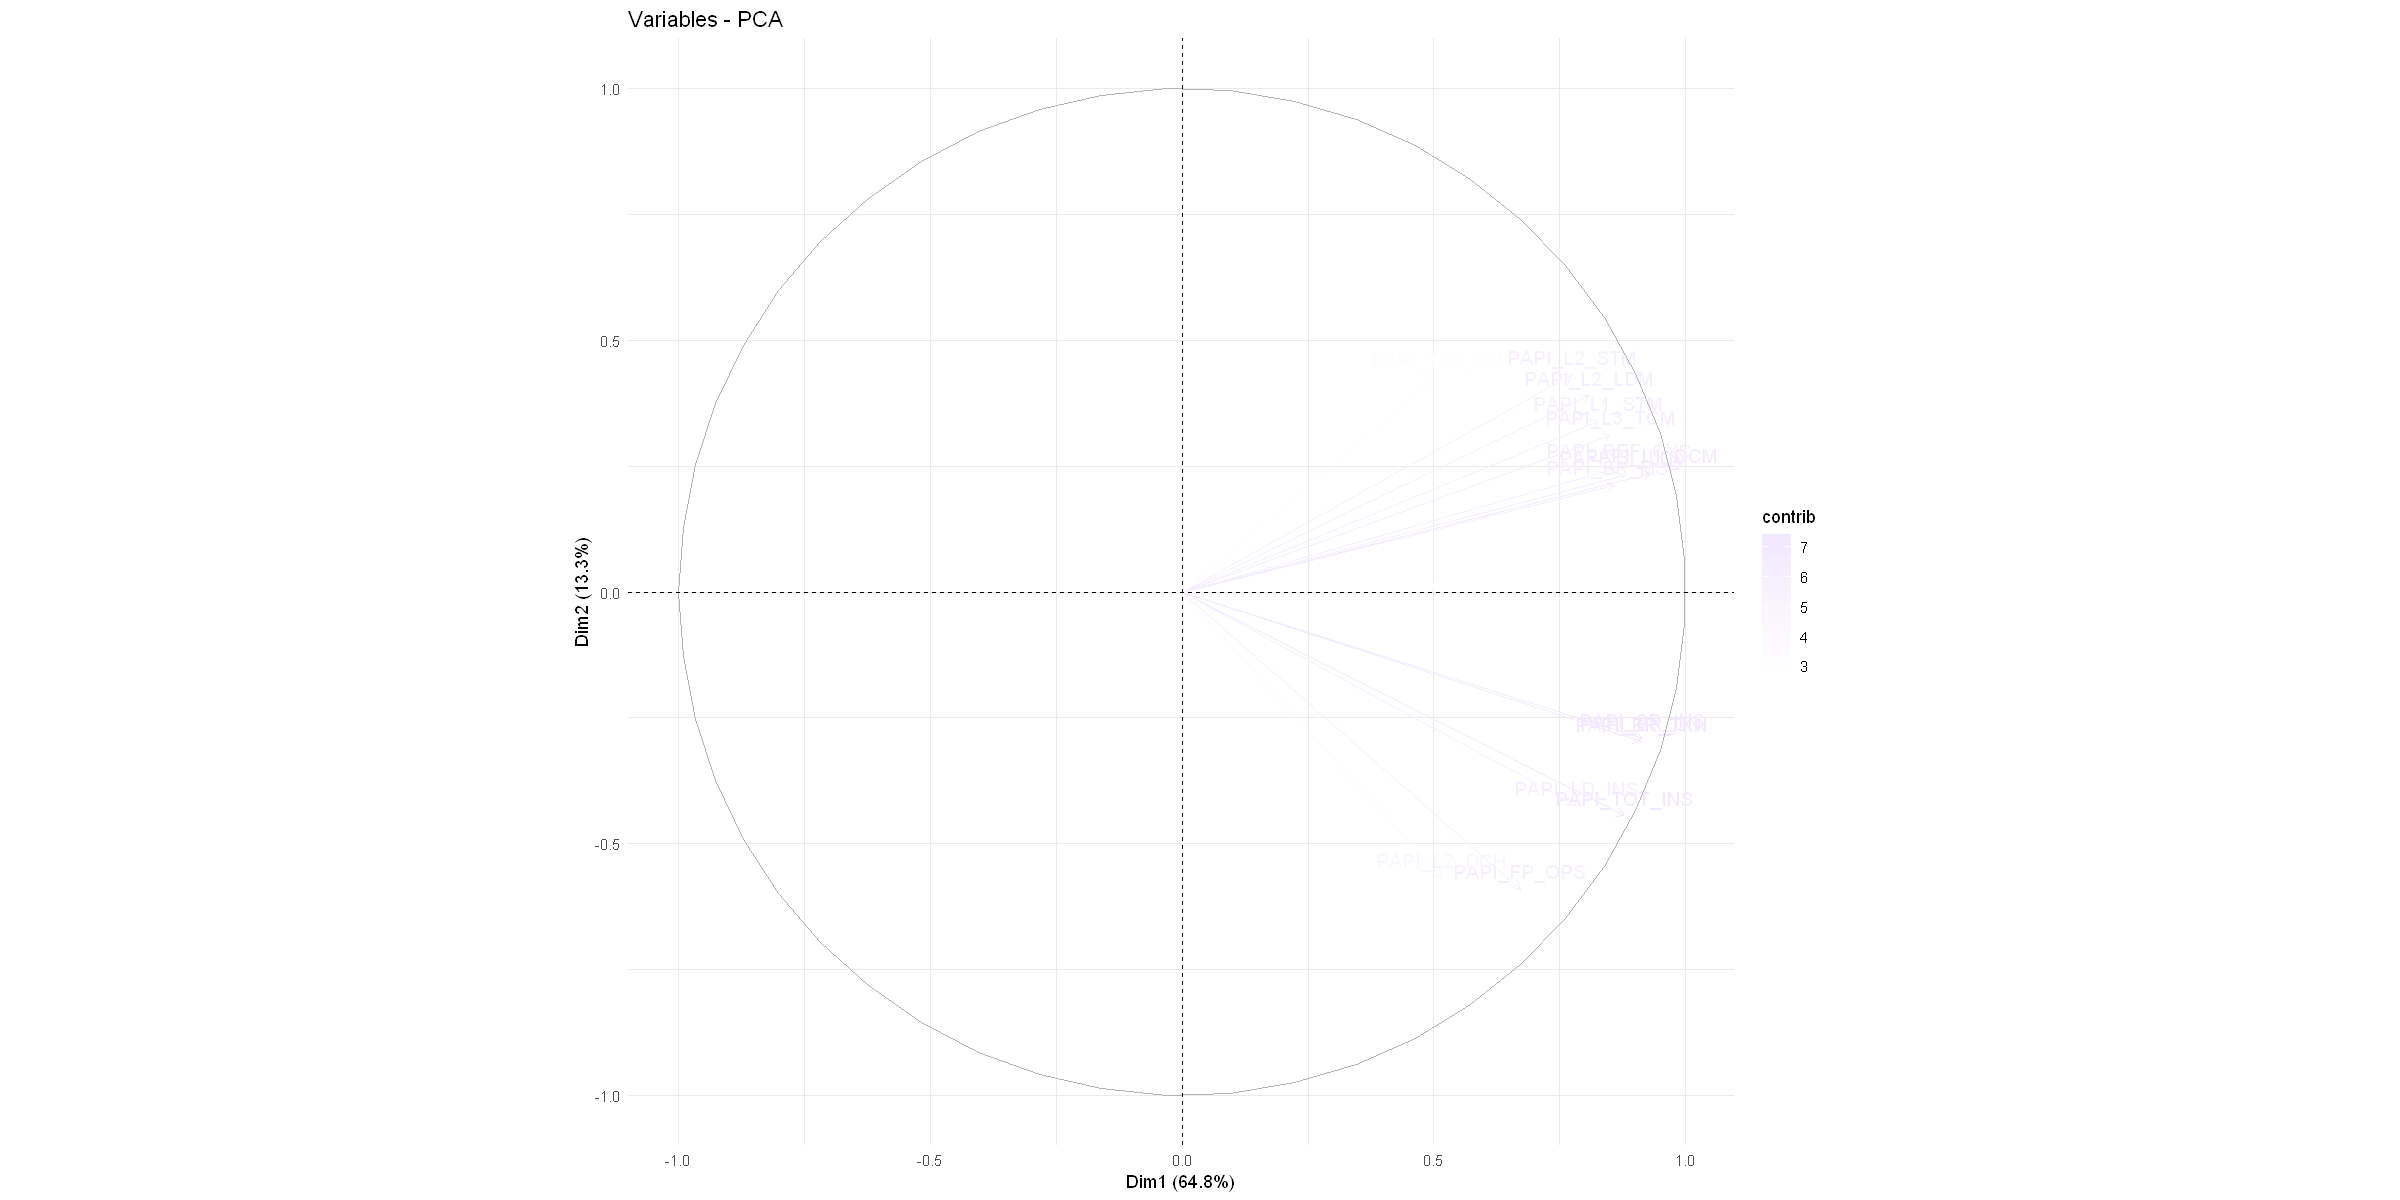

In [43]:
fviz_pca_var(res.pca, col.var="contrib") + scale_color_gradient2(low="white", mid="blue", high="red", midpoint=50) + theme_minimal()

In [44]:
new_mydata1 = mydata[,5:61]
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TOT_CYC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_DM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_FP_INS))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCW))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_DCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_INS))

new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICA))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L3_ICR))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L1_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCH))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_L2_TCM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_TLB_IM))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_RES_STL))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_PRC))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_BR_MSP))




new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_DP))
new_mydata1 <- subset(new_mydata1, select = -c(PAPI_VEC_SP))

my_data_ordered1 <- new_mydata1[,order(colnames(new_mydata1))]


options(repr.matrix.max.rows = 100)
options(repr.matrix.max.cols = 100)
res1 <- cor(my_data_ordered1)
dim(res1)
round(res1, 2)

ERROR: Error in `[.data.frame`(mydata, , 5:61): undefined columns selected


In [ ]:
library(corrplot)


corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "AOE", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=2)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=3)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=4)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=6)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=7)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=8)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=9)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=10)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=11)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=12)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=13)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=14)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=15)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=16)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "hclust", number.cex = 0.5, addrect=17)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "FPC", number.cex = 0.5)

In [ ]:
corrplot(res1, tl.col = "black", tl.srt = 90, tl.cex = 0.7, method= "square", order = "alphabet", number.cex = 0.5)